<a href="https://colab.research.google.com/github/abdullahhabib6/AI-TRASH-TINYML-ARDNANO33/blob/main/GarbageClassificationMobileNET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
import cv2
import os
import shutil
import concurrent.futures


from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential, Model, regularizers
# Various Layers that can be part of the network
from tensorflow.keras.layers import (Conv2D, ZeroPadding2D, Activation, Input,
                                     SeparableConv2D, BatchNormalization,
                                     MaxPooling2D, AveragePooling2D, Lambda,
                                     Flatten, Dense,Dropout)

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import (ImageDataGenerator, 
                                                 img_to_array)
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.utils import to_categorical
import datetime
import matplotlib.image as image
from PIL import Image
from tensorflow.keras.losses import BinaryCrossentropy
%matplotlib inline
import concurrent.futures as multi
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

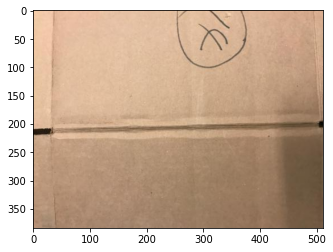

In [ ]:
DATADIR = '/content/drive/My Drive/GarbageClassification'
CATEGORIES = ["cardboard" , "glass" , "metal" , "paper" , "plastic", "trash"]

for category in CATEGORIES:
    path = os.path.join(DATADIR , category) #path to the fire or non-fire directory
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        img_rgb = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        plt.imshow(img_rgb)
        plt.show()
        break
    break

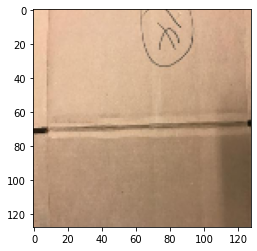

In [ ]:
IMG_WIDTH = IMG_HEIGHT = 128
DEPTH = 3
BATCH_SIZE = 32
EPOCHS = 10
shuffle = False
new_array = cv2.resize(img_array, (IMG_WIDTH, IMG_HEIGHT))
new_rgb = cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB)
plt.imshow(new_rgb)
plt.show()


In [ ]:
training_data = [] 
0
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR , category) 
        class_num = CATEGORIES.index(category)
        import matplotlib.image as mpimg
        for img in os.listdir(path):
            try: 
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (IMG_WIDTH, IMG_HEIGHT))
                new_rgb = cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB)
                training_data.append([new_rgb,class_num]) 
            except Exception as e:
                pass


create_training_data()

In [ ]:
#data_augmentation = tf.keras.Sequential([
     #layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
     #layers.experimental.preprocessing.RandomRotation(0.2)])


In [ ]:
#data_augmentation = tf.keras.Sequential([
     #layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
     #layers.experimental.preprocessing.RandomRotation(0.2)])

#augmented_data = []

def augment_training_data():
  for category in CATEGORIES:
    path = os.path.join (DATADIR , category)
    class_num2 = CATEGORIES.index(category)
    import matplotlib.image as mpimg
    for img in os.listdir(path):
      try:
          img_array = cv2.imread(os.path.join(path,img))
          new_array = cv2.resize(img_array, (IMG_WIDTH, IMG_HEIGHT))
          new_rgb = cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB)
          arrayimg = img_to_array(new_rgb)
          augmented_image = data_augmentation(tf.expand_dims(arrayimg,0))
          augmented_data.append([augmented_image,class_num2])
      except Exception as e:
          pass
 
#augment_training_data()        

In [ ]:
print(len(training_data))
#print(len(augmented_data)) 

2527


In [ ]:
import random 

random.shuffle(training_data)
#random.shuffle(augmented_data)

In [ ]:
for sample in training_data[:5]:
    print(sample[0])

[[[255 255 253]
  [255 255 253]
  [255 255 253]
  ...
  [193 189 177]
  [194 190 178]
  [192 188 176]]

 [[255 255 253]
  [255 255 253]
  [255 255 253]
  ...
  [193 189 177]
  [194 190 178]
  [192 188 176]]

 [[255 255 253]
  [255 255 253]
  [255 255 253]
  ...
  [193 189 177]
  [194 190 178]
  [192 188 176]]

 ...

 [[219 215 203]
  [219 215 203]
  [218 214 202]
  ...
  [169 167 154]
  [168 166 153]
  [168 166 153]]

 [[219 215 203]
  [219 215 203]
  [218 214 202]
  ...
  [169 167 154]
  [168 166 153]
  [168 166 153]]

 [[219 215 203]
  [219 215 203]
  [218 214 202]
  ...
  [169 167 154]
  [168 166 153]
  [168 166 153]]]
[[[ 30  31  35]
  [ 95  96 100]
  [103 104 108]
  ...
  [173 172 186]
  [173 172 186]
  [171 170 184]]

 [[ 96  97 101]
  [101 102 106]
  [ 55  56  60]
  ...
  [173 172 186]
  [173 172 186]
  [171 170 184]]

 [[ 76  77  81]
  [ 36  37  41]
  [ 34  35  39]
  ...
  [173 172 186]
  [173 172 186]
  [171 170 184]]

 ...

 [[226 228 243]
  [224 226 241]
  [225 227 242]
  ..

In [ ]:
#for sample in augmented_data[:5]:
    #print(sample[0])

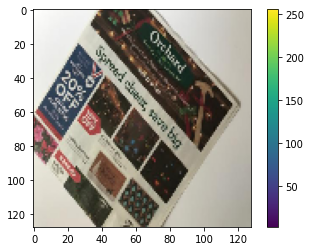

3


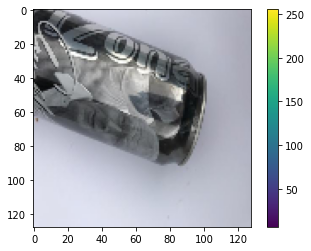

2


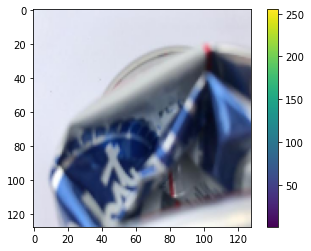

2


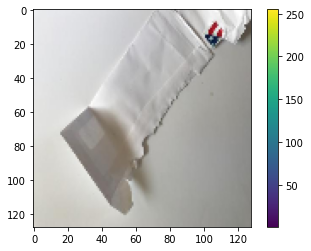

3


In [ ]:
for sample in training_data[:4]: #Pre-processing of data by saving the data into a single list variable 
    plt.figure()
    plt.imshow(sample[0]) #It provides the original image set at [0] and the resultant set i.e. y(labels) at [1]
    plt.colorbar()
    plt.grid(False)
    plt.show()
    print(sample[1]) #checking the correctness of the label 

In [ ]:
#augmented_data = np.array(augmented_data).reshape(-1, IMG_WIDTH, IMG_HEIGHT, DEPTH) 

#for sample in augmented_data[:4]: #Pre-processing of data by saving the data into a single list variable 
    #plt.figure()
    #plt.imshow(np.squeeze(sample[0])) #It provides the original image set at [0] and the resultant set i.e. y(labels) at [1]
    #plt.colorbar(ticks=range(255))
    #plt.grid(False)
    #plt.show()
    #print(sample[1]) #checking the correctness of the label 

In [ ]:
shuffle = True
X = [] 
y = []
#A = []
#b = []
for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_WIDTH, IMG_HEIGHT, DEPTH) #necessary for keeping the dimensions of X as a numpy array
y = np.array(y)

#for features, label in augmented_data:
    #A.append(features)
    #b.append(label)
    
#A = np.array(A).reshape(-1, IMG_WIDTH, IMG_HEIGHT, DEPTH) #necessary for keeping the dimensions of X as a numpy array
#b = np.array(b)


In [ ]:
print(X.shape)
print(y.shape)

#print(A.shape)
#print(b.shape)

(2527, 128, 128, 3)
(2527,)


In [ ]:
training_dataset = []
#for i in range(2527):
  #training_dataset.append(A[i])

for j in range(2527):
  training_dataset.append(X[j])


In [ ]:
label_dataset = []
for i in range(2527):
  label_dataset.append(y[i])

#for j in range(2527):
  #label_dataset.append(b[i])

In [ ]:
print(len(training_dataset))
traini = np.array(training_dataset).reshape(-1, IMG_WIDTH, IMG_HEIGHT, DEPTH)
print(traini.shape)

print(len(label_dataset))
labeli = np.array(label_dataset)
print(labeli.shape)

2527
(2527, 128, 128, 3)
2527
(2527,)


In [ ]:
VALIDATION_SPLIT = 0.2
(trainX, validX, trainY, validY) = train_test_split(traini, labeli, test_size= VALIDATION_SPLIT, random_state=42 )

print ('The number of training and validation dataset after split:')
print(trainX.shape)
print(trainY.shape)
print(validX.shape)
print(validY.shape)

The number of training and validation dataset after split:
(2021, 128, 128, 3)
(2021,)
(506, 128, 128, 3)
(506,)


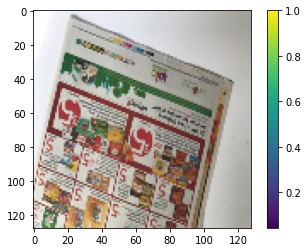

In [ ]:
#Displaying A Picture from the Training Set
plt.figure()
plt.imshow(trainX[1]/255)
plt.colorbar()
plt.grid(False)
plt.show()


In [ ]:
if shuffle:
  garb_img = ImageDataGenerator(
      rescale = 1./255,
      rotation_range=20,
      #width_shift_range=0.2,
      #height_shift_range=0.2,
      horizontal_flip=True,
      #brightness_range=[0.2,1],
      #zoom_range=0.2,
      #featurewise_center=True,
      #featurewise_std_normalization=True,
      #fill_mode = 'nearest'
  )


In [ ]:
#data_augmentation = tf.keras.Sequential([
  #tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
  #tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
#])

In [ ]:
train_datasetgen = garb_img.flow(

          trainX, 
          trainY, 
          batch_size= BATCH_SIZE,
          shuffle=True,
  )

val_datasetgen = garb_img.flow(
          validX, 
          validY, 
          batch_size= BATCH_SIZE,
          shuffle=True,
  )


In [ ]:
#Modelling
from tensorflow.keras.applications import MobileNet
mobilenet_model = MobileNet(
    include_top=False, #Most important--last layer is included
    weights="imagenet",
    alpha=1.0,
    #dropout=0.01,
    depth_multiplier=1,
    classes=1000,
    input_tensor=None,
    input_shape=(IMG_HEIGHT, IMG_WIDTH, DEPTH),
    pooling=None,
    classifier_activation="softmax",)
mobilenet_model.trainable = False # freeze the orignianl layers of the mobilenet model
mn=True

17227776/17225924 [==============================] - 0s 0us/step


In [ ]:
mobilenet_model.summary()

Model: "mobilenet_1.00_128"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 64, 64, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 64, 64, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 64, 64, 32)        128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 64, 64, 32) 

In [ ]:
class TransferLearning():
   def modelmn(self):
    X = mobilenet_model.layers[-1].output
    X = Flatten()(X)
    X = Dense(16, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=1e-3, l2=1e-2))(X)
    X = Dense(8, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=1e-3, l2=1e-2))(X)
    X = Dense(6,activation='sigmoid')(X)
    shorter_model = Model(mobilenet_model.inputs, outputs=X)
    return shorter_model

In [ ]:
my_model = TransferLearning()
my_model = my_model.modelmn()
base_learning_rate=0.0001
my_model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
                 loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 metrics=['accuracy'])
mc = ModelCheckpoint('2017ee57.h5', monitor='val_loss', mode='min', 
                      save_best_only=True)
callback_list = []
callback_list.append(mc)
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tb = TensorBoard(log_dir=log_dir, histogram_freq=1)
callback_list.append(tb)

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard
!rm -rf ./logs/ 

In [ ]:
EPOCHS = 10
history = my_model.fit(
    x= train_datasetgen,
    validation_data = val_datasetgen, 
    epochs = EPOCHS,
    callbacks= callback_list)

Epoch 1/10
64/64 [==============================] - 41s 611ms/step - loss: 4.6238 - accuracy: 0.2455 - val_loss: 3.9884 - val_accuracy: 0.4763
Epoch 2/10
64/64 [==============================] - 39s 603ms/step - loss: 3.8357 - accuracy: 0.5465 - val_loss: 3.4957 - val_accuracy: 0.6719
Epoch 3/10
64/64 [==============================] - 38s 601ms/step - loss: 3.3284 - accuracy: 0.6890 - val_loss: 3.2291 - val_accuracy: 0.7134
Epoch 4/10
64/64 [==============================] - 38s 601ms/step - loss: 3.0521 - accuracy: 0.7498 - val_loss: 3.0201 - val_accuracy: 0.7411
Epoch 5/10
64/64 [==============================] - 38s 599ms/step - loss: 2.7917 - accuracy: 0.7864 - val_loss: 2.8146 - val_accuracy: 0.7787
Epoch 6/10
64/64 [==============================] - 38s 598ms/step - loss: 2.5270 - accuracy: 0.8331 - val_loss: 2.6618 - val_accuracy: 0.7668
Epoch 7/10
64/64 [==============================] - 38s 597ms/step - loss: 2.3727 - accuracy: 0.8580 - val_loss: 2.5017 - val_accuracy: 0.8063

In [ ]:
ft_mobilenet_model = MobileNet(
    include_top=False, #Most important--last layer is included
    weights="imagenet",
    alpha=1.0,
    dropout=0.001,
    depth_multiplier=1,
    classes=1000,
    input_tensor=None,
    input_shape=(IMG_HEIGHT, IMG_WIDTH, DEPTH),
    pooling=None,
    classifier_activation="softmax",)
ft_mobilenet_model.trainable = True # freeze the orignianl layers of the mobilenet model
mn=True

In [ ]:
print("Number of layers in the base model: ", len(ft_mobilenet_model.layers))


Number of layers in the base model:  86


In [ ]:
# Fine-tune from this layer onwards
fine_tune_at = 78

# Freeze all the layers before the `fine_tune_at` layer
for layer in ft_mobilenet_model.layers[:fine_tune_at]:
  layer.trainable =  False

In [ ]:
ft_mobilenet_model.summary()

Model: "mobilenet_1.00_128"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 64, 64, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 64, 64, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 64, 64, 32)        128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 64, 64, 32) 

In [ ]:
class TransferLearning2():
   def modelmn2(self):
    X = ft_mobilenet_model.layers[-1].output
    X = Flatten()(X)
    X = Dense(16, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=1e-3, l2=1e-2))(X)
    X = Dense(8, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=1e-3, l2=1e-2))(X)
    X = Dense(6,activation='sigmoid')(X)
    shorter_model = Model(ft_mobilenet_model.inputs, outputs=X)
    return shorter_model

In [ ]:
my_model = TransferLearning2()
my_model = my_model.modelmn2()
base_learning_rate=0.0001
my_model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
                 loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 metrics=['accuracy'])
mc = ModelCheckpoint('2017ee57_1.h5', monitor='val_loss', mode='min', 
                      save_best_only=True)
callback_list = []
callback_list.append(mc)
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tb = TensorBoard(log_dir=log_dir, histogram_freq=1)
callback_list.append(tb)

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard
!rm -rf ./logs/ 

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
EPOCHS = 10
history = my_model.fit(
    x= train_datasetgen,
    validation_data = val_datasetgen, 
    epochs = EPOCHS,
    callbacks= callback_list)

Epoch 1/10
64/64 [==============================] - 59s 897ms/step - loss: 4.5029 - accuracy: 0.3816 - val_loss: 3.8947 - val_accuracy: 0.6087
Epoch 2/10
64/64 [==============================] - 57s 892ms/step - loss: 3.7712 - accuracy: 0.6552 - val_loss: 3.5553 - val_accuracy: 0.6502
Epoch 3/10
64/64 [==============================] - 56s 882ms/step - loss: 3.4514 - accuracy: 0.7232 - val_loss: 3.2622 - val_accuracy: 0.7134
Epoch 4/10
64/64 [==============================] - 56s 868ms/step - loss: 3.1475 - accuracy: 0.7533 - val_loss: 3.0231 - val_accuracy: 0.7372
Epoch 5/10
64/64 [==============================] - 55s 857ms/step - loss: 2.9009 - accuracy: 0.7771 - val_loss: 2.8114 - val_accuracy: 0.7490
Epoch 6/10
64/64 [==============================] - 53s 845ms/step - loss: 2.6611 - accuracy: 0.7771 - val_loss: 2.5964 - val_accuracy: 0.7708
Epoch 7/10
64/64 [==============================] - 53s 827ms/step - loss: 2.4551 - accuracy: 0.8083 - val_loss: 2.4651 - val_accuracy: 0.7372

In [ ]:
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
fig = plt.figure()
plt.plot(N, history.history["loss"], label="train_loss")
plt.plot(N, history.history["val_loss"], label="val_loss")
plt.plot(N, history.history["accuracy"], label="train_acc")
plt.plot(N, history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()

In [ ]:
tflite_model_name = 'garbagemn_model'
c_model_name = 'garbagemn_model'
converter=tf.lite.TFLiteConverter.from_keras_model(my_model)
converter.optimizations=[tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = converter.convert()

open(tflite_model_name + '.tflite', 'wb').write(tflite_model)

In [ ]:
def hex_to_c_array(hex_data, var_name):

  c_str = ''

  c_str += '#ifndef' + var_name.upper() + '_H\n'
  c_str += '#define' + var_name.upper() + '_H\n\n'

  c_str += '\nunsigned int' + var_name + '_len =' + str(len(hex_data)) + ';\n'

  c_str += 'unsigned char' + var_name + '[] = {'
  hex_array = []
  for i, val in enumerate(hex_data) :

    hex_str = format(val, '#04x')

    if (i + 1) < len(hex_data):
      hex_str += ','
    if (i + 1) % 12 == 0:
      hex_str += '\n'
    hex_array.append(hex_str)

    c_str += '\n' + format(' '.join(hex_array)) + '\n};\n\n'
    c_str += '#endif //' + var_name.upper() + '_H'

    return c_str
    

In [ ]:
with open(c_model_name + '.h', 'w') as file:
  file.write(hex_to_c_array(tflite_model, c_model_name))